In [143]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import plotly.graph_objects as go  #plotly 4.0.0rc1
from plotly.subplots import make_subplots
from matplotlib import pyplot
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import itertools

from importlib import reload

In [144]:
df = pd.read_hdf('data_mab.h5')
df = df.transpose()
df = df.cumsum()

In [145]:
idx = df.columns
alphas = idx.get_level_values(level='alpha').unique()
alphas

Index(['1000000000', '10', '2', '0.99999', '0.5', '1e-05'], dtype='object', name='alpha')

In [146]:
data_contour = pd.read_csv('../contour.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour

,bound_0,bound_1,bound_2,bound_3,bound_4,bound_5,bound_6,bound_7,bound_8,bound_9,...,bound_90,bound_91,bound_92,bound_93,bound_94,bound_95,bound_96,bound_97,bound_98,bound_99
0,18.440916,17.421940,16.362997,15.274645,14.223141,13.220021,12.265287,11.358940,10.500980,9.691413,...,36.424488,37.801117,39.137772,40.434479,41.691216,42.908001,44.084827,45.221684,46.318592,47.375526
1,20.604519,19.770248,18.903259,18.003559,17.071136,16.106001,15.108150,14.077579,13.014295,11.926105,...,40.748482,41.875568,42.969929,44.031582,45.060509,46.056732,47.020233,47.951012,48.849083,49.714432
2,22.357800,21.674757,20.964928,20.228313,19.464909,18.674725,17.857750,17.013990,16.143448,15.246114,...,44.270538,45.193314,46.089302,46.958511,47.800926,48.616566,49.405415,50.167473,50.902752,51.611237
3,23.775135,23.215908,22.634747,22.031658,21.406637,20.759689,20.090809,19.399996,18.687256,17.952581,...,47.136021,47.891533,48.625107,49.336754,50.026466,50.694252,51.340107,51.964027,52.566025,53.146080
4,24.917427,24.459568,23.983757,23.489988,22.978264,22.448586,21.900953,21.335363,20.751820,20.150322,...,49.463963,50.082520,50.683117,51.265766,51.830452,52.377190,52.905975,53.416798,53.909668,54.384583
5,25.834530,25.459667,25.070103,24.665840,24.246876,23.813213,23.364849,22.901783,22.424019,21.931553,...,51.351791,51.858223,52.349953,52.826981,53.289310,53.736938,54.169868,54.588097,54.991627,55.380451
6,26.567261,26.260349,25.941402,25.610420,25.267403,24.912350,24.545258,24.166134,23.774971,23.371775,...,52.879284,53.293915,53.696510,54.087070,54.465595,54.832077,55.186535,55.528946,55.859329,56.177673
7,27.149044,26.897766,26.636635,26.365650,26.084808,25.794117,25.493568,25.183167,24.862911,24.532804,...,54.111763,54.451237,54.780853,55.100616,55.410522,55.710579,56.000782,56.281128,56.551620,56.812260
8,27.607243,27.401512,27.187717,26.965851,26.735920,26.497921,26.251854,25.997715,25.735516,25.465244,...,55.102707,55.380642,55.650509,55.912312,56.166042,56.411705,56.649303,56.878830,57.100292,57.313683
9,27.964252,27.795818,27.620777,27.439129,27.250875,27.056019,26.854557,26.646488,26.431812,26.210533,...,55.895897,56.123451,56.344398,56.558743,56.766479,56.967613,57.162140,57.350063,57.531380,57.706089


In [147]:
import matplotlib.cm as cm # matplotlib's color map library
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

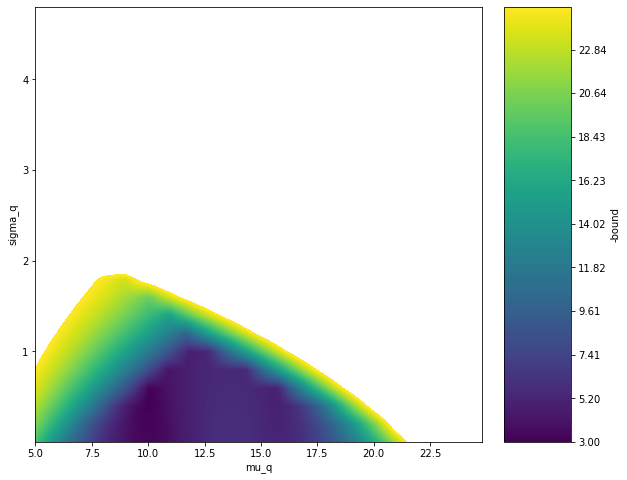

In [152]:
levels = np.linspace(3.0,25, num=500)

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)

line_colors1 = ['black']
axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


In [153]:
samples0 = list(np.load('../samples_arm_0.npy'))
samples1 = np.load('../samples_arm_1.npy')
samples2 = np.load('../samples_arm_2.npy')


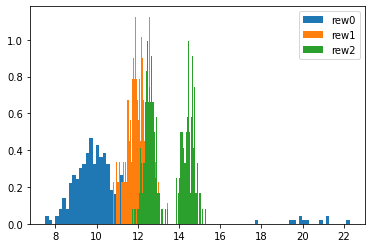

In [154]:
rew0 = list(np.load('../rew_arm_0.npy'))
rew1 = list(np.load('../rew_arm_1.npy'))
rew2 = list(np.load('../rew_arm_2.npy'))

fig = plt.hist(rew0,  density=True, alpha=1, bins=90, label='rew0')
fig = plt.hist(rew1,  density=True, alpha=1, bins=90, label='rew1')
fig = plt.hist(rew2,  density=True, alpha=1, bins=90, label='rew2')

plt.legend(loc='upper right')


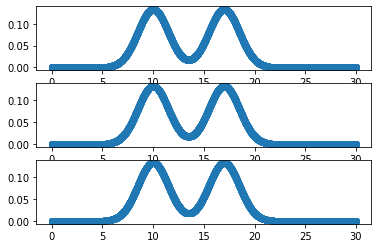

In [155]:
# Plot prior for each arm
ps0 = list(np.load('../ps_arm_0.npy'))
ps1 = list(np.load('../ps_arm_1.npy'))
ps2 = list(np.load('../ps_arm_2.npy'))

fig, axes = plt.subplots(3)

axes[0].scatter(samples0, ps0)
axes[1].scatter(samples1, ps1)
axes[2].scatter(samples2, ps2)

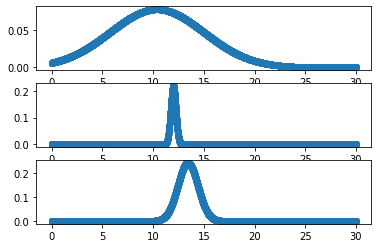

In [156]:
# Plot likelihood for each arm
pos0 = list(np.load('../pos_arm_0.npy'))
pos1 = list(np.load('../pos_arm_1.npy'))
pos2 = list(np.load('../pos_arm_2.npy'))

fig, axes = plt.subplots(3)

axes[0].scatter(samples0, pos0)
axes[1].scatter(samples1, pos1)
axes[2].scatter(samples2, pos2)

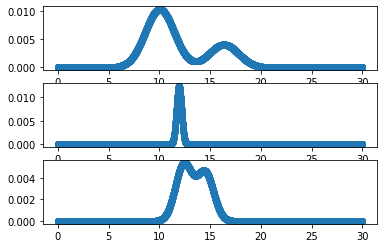

In [157]:
# Plot joint for each arm
pso0 = list(np.load('../pso_arm_0.npy'))
pso1 = list(np.load('../pso_arm_1.npy'))
pso2 = list(np.load('../pso_arm_2.npy'))

fig, axes = plt.subplots(3)

axes[0].scatter(samples0, pso0)
axes[1].scatter(samples1, pso1)
axes[2].scatter(samples2, pso2)


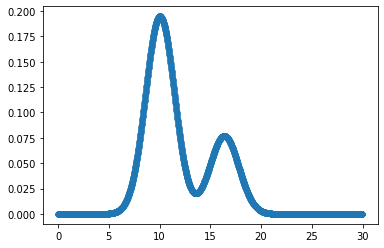

In [158]:
# Plot true posterior for arm 1
import scipy.stats as stats
import math

muinf = 16.27
varinf = 2

mu10 = 10.3
var10= 1.5

mu2 = 10.2
var2 = 1.8

mu1 = 10.1
var1 = 1.9

mu05 = 10.7
var05 = 4.2


mu0 = 9.7
var0 = 53

#pso2 = pso
mus = [muinf, mu10, mu2, mu1, mu05, mu0]
varss = [varinf, var10, var2, var1, var05, var0]

data = pd.DataFrame()


for it in range(len(mus)):
    x = np.random.randn(100000) * np.sqrt(varss[it]) + mus[it]
    data['col_'+str(it)] = x    #plt.plot(x, stats.norm.pdf(x, mus[it], sigma))

fig = plt.scatter(samples0, np.multiply(pso0, 1/0.0528), linewidths=0.00001)


/home/francesco/.local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


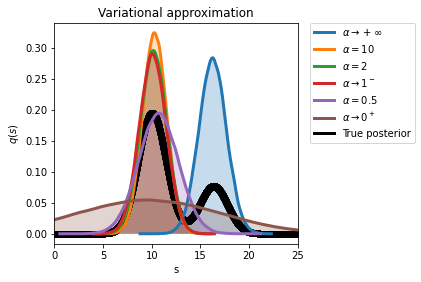

In [159]:
# Plot true posterior and variational posteriors for arm 1 and different alpha

labels = [r'$\alpha \rightarrow +\infty$',r'$\alpha = 10$', r'$\alpha = 2$', r'$\alpha \rightarrow 1^-$',
            r'$\alpha = 0.5$', r'$\alpha \rightarrow 0^+$']
f, ax = plt.subplots(1, 1, figsize=(6,4))

for it in range(len(mus)):
    sns.distplot(data['col_'+str(it)], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 3}, 
                      label = labels[it])
sns.distplot([1], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'True posterior', color='black')    
plt.scatter(samples0, np.multiply(pso0, 1/0.0528), color='black', label='s')

    
plt.legend([r'$\alpha \rightarrow +\infty$',r'$\alpha = 10$', r'$\alpha = 2$', r'$\alpha \rightarrow 1^-$',
            r'$\alpha = 0.5$', r'$\alpha \rightarrow 0^+$', 'True posterior'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlim([0,25])
ax.set(xlabel='s', ylabel=r'$q(s)$', title='Variational approximation')

f.tight_layout(pad=1.0)
f.savefig(base_path+'var_posterior.pdf', bbox_inches='tight', pad_inches=0)
